<a href="https://colab.research.google.com/github/Sharminrahi/Deep-Learning/blob/main/Assignment_1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Sharmin AKhter
## ID: 201891112
## Date: 26-01-2023

# Question 2
Logistic regression on the Titanic dataset. Download the Titanic dataset from
Brightspace and analyse it in Python. The goal is to predict the probability of survival of the passenger as a function of gender, class, etc. To complete this task, answer the following questions:

(a) Are there any missing values in the dataset? If so, what would be the most appropriate way of dealing with them?

(b) Have there been more male or more female survivors? What about the in
uence on which class the passengers travelled in?

(c) Which features of the dataset do you think need to be included for predicting the survival of a passenger (to answer this question quantitatively, you could train various models with a subset of the given features)?
What is the  nal accuracy of your model, again using a 80%/20% split for training/test data. Are there any other veri cation measures you think would be meaningful here (e.g. precision, recall, etc.)?

# Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
#Mount drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Getting Data

# Test Data

In [ ]:
file_path = '/content/drive/MyDrive/TitanicTest.csv'
# Reading dataset 
titanic_test = pd.read_csv(file_path)
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Train Data

In [ ]:
file_path = '/content/drive/MyDrive/TitanicTrain.csv'
# Reading dataset 
titanic_train = pd.read_csv(file_path)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration

# Train Data

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Test data

In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Shape of Train data

In [ ]:
titanic_train.shape

(891, 12)

The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects

# Test info

In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Shape of test data

In [ ]:
titanic_test.shape

(418, 11)

The testing-set has 418 examples and 11 features. 2 of the features are floats, 4 are integers and 5 are objects

#Data Description

In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above describtion of the training dataset we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

# test data

In [ ]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Question 2(a) Are there any missing values in the dataset? If so, what would be the most appropriate way of dealing with them?

# Part (a) Checking Missing Values

In [ ]:
print(titanic_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Test Data

In [ ]:
print(titanic_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Percentage for train and test data

In [ ]:
total = titanic_train.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [ ]:
total = titanic_test.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_test.isnull().sum()/titanic_test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


# Part (b) what would be the most appropriate way of dealing with them

# For Train Data

The **Embarked** feature has only a couple of missing values, which can be easily filled in. However, the **Age** feature has a considerable number of missing values (177) which will be harder to handle. The **Cabin** feature requires further examination, but it appears that it might be best to remove it from the dataset since a significant proportion of it is missing (77%).

# For Test Data

The Fare feature has only one missing value, which can be easily filled. However, the Age feature has a considerable number of missing values (86) which will be harder to handle. The Cabin feature has a large number of missing values (327) and it appears that it might be best to remove it from the dataset since a significant proportion of it is missing (78%).

# Drop Unwanted column for train and test data

In [ ]:
#Drop the unwanted columns
titanic_train_new = titanic_train.drop(['Cabin','Ticket','Name','PassengerId', 'Embarked'],axis=1)
titanic_train_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [ ]:
#Drop the unwanted columns
titanic_test_new = titanic_test.drop(['Cabin','Ticket','Name','PassengerId', 'Embarked'],axis=1)
titanic_test_new

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


# Checking missing value in new dataset

In [ ]:
print(titanic_train_new.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [ ]:
print(titanic_test_new.isnull().sum())

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


# Fill missing value

In [ ]:
titanic_train_new = titanic_train_new.fillna(titanic_train_new.mean())
titanic_train_new

<ipython-input-157-cd57e670f4df>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_train_new = titanic_train_new.fillna(titanic_train_new.mean())


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [ ]:
titanic_test_new = titanic_test_new.fillna(titanic_test_new.mean())
titanic_test_new

<ipython-input-158-f282b654a7a6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_test_new = titanic_test_new.fillna(titanic_test_new.mean())


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.50000,0,0,7.8292
1,3,female,47.00000,1,0,7.0000
2,2,male,62.00000,0,0,9.6875
3,3,male,27.00000,0,0,8.6625
4,3,female,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500
414,1,female,39.00000,0,0,108.9000
415,3,male,38.50000,0,0,7.2500
416,3,male,30.27259,0,0,8.0500


In [ ]:
print(titanic_train_new.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [ ]:
print(titanic_test_new.isnull().sum())

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


# Question 2(b)
Have there been more male or more female survivors? What about the influence on
which class the passengers travelled in?

# Part (a)
Have there been more male or more female survivors?

In [ ]:
# Number of Male survivors from train dataset
male_survivors = titanic_train[(titanic_train['Sex'] == 'male') & (titanic_train['Survived'] == 1)].shape[0]
male_survivors

109

In [ ]:
# Number of Male survivors from train dataset
male_survivors = titanic_train_new[(titanic_train_new['Sex'] == 'male') & (titanic_train_new['Survived'] == 1)].shape[0]
male_survivors

109

In [ ]:
# Number of Female survivors from train dataset
female_survivors = titanic_train_new[(titanic_train_new['Sex'] == 'female') & (titanic_train_new['Survived'] == 1)].shape[0]
female_survivors

233

# Visualize the value

In [ ]:
df3 = titanic_train_new.groupby(['Survived','Sex'])['Sex'].count().unstack()
df3

Sex,female,male
Survived,,
0,81,468
1,233,109


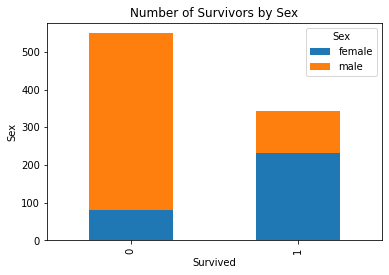

In [ ]:
df3.plot(kind = 'bar', stacked = True)
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.title('Number of Survivors by Sex')
plt.show()

## From the above analysis we can see that there are more Female survival compare to Male survival

# Part b
What about the influence on which class the passengers travelled in?

In [ ]:
df4 = titanic_train_new.groupby(['Survived','Pclass'])['Pclass'].count().unstack()
df4

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


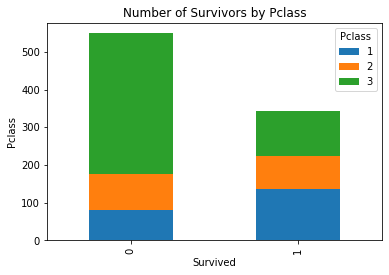

In [ ]:
df4.plot(kind = 'bar', stacked = True)
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.title('Number of Survivors by Pclass')
plt.show()

# Question 2(c)
Which features of the dataset do you think need to be included for predicting the survival of a passenger (to answer this question quantitatively, you could train various models with a subset of the given features)?

It make sense for me everything except **‘PassengerId’**, **‘Ticket’** and **‘Name’** would be correlated with a high survival rate.

1. Age and Sex:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

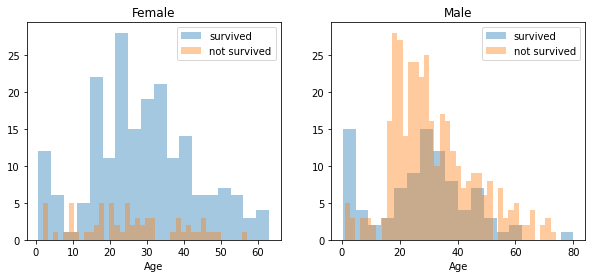

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_train[titanic_train['Sex']=='female']
men = titanic_train[titanic_train['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()

ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

An analysis of the data reveals that there is a higher probability of survival for men between the ages of 18 and 30, with a slight increase in survival chances also seen for women in this age range. However, the probability of survival is higher for women between the ages of 14 and 40. It is also notable that men between the ages of 5 and 18 have a low probability of survival, while this is not the case for women. Additionally, infants have a slightly higher probability of survival. To ensure all features are on a similar scale, I plan to group the ages into specific age ranges for further analysis.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


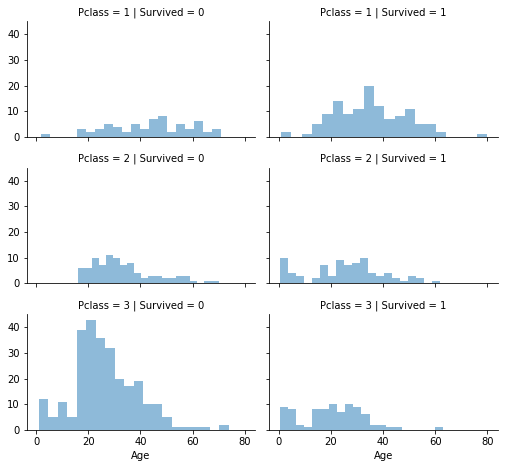

In [ ]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
titanic_train_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
titanic_test_new.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
titanic_test_new.Sex

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

In [ ]:
X_train = titanic_train_new.drop("Survived", axis=1)
X_train['Sex'] = X_train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
Y_train = titanic_train_new["Survived"]

# Select the desired columns
X_test = titanic_test_new[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Convert 'Sex' column to numerical values (if it is in string format)
X_test['Sex'] = X_test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
X_test['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [ ]:
X_train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the training data into 80% training and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy: ', accuracy*100)


Test Accuracy:  81.00558659217877


Accuracy is a commonly used measure for classification models, but it may not always be the best metric to evaluate the performance of a model, especially when the class distribution is imbalanced. In such cases, it's recommended to use additional evaluation metrics such as precision, recall, F1-score, and AUC-ROC.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate precision
precision = precision_score(Y_test, y_pred)
print('Precision: ', precision*100)

# Calculate recall
recall = recall_score(Y_test, y_pred)
print('Recall: ', recall*100)

# Calculate F1-score
f1 = f1_score(Y_test, y_pred)
print('F1-score: ', f1*100)

# Calculate AUC-ROC
roc_auc = roc_auc_score(Y_test, y_pred)
print('AUC-ROC: ', roc_auc*100)


Precision:  80.3030303030303
Recall:  71.62162162162163
F1-score:  75.71428571428571
AUC-ROC:  79.62033462033462


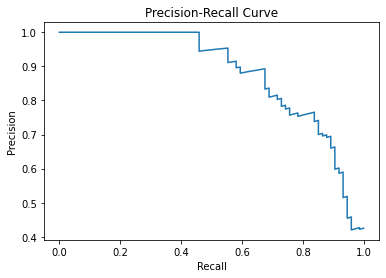

In [ ]:
from sklearn.metrics import precision_recall_curve

# Make predictions on the test data
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
